In [1]:
from pandas.testing import assert_frame_equal
import pandas as pd
df = pd.read_csv('bitcoin.csv')
df.drop(columns=['hashrate_btc', 'fee_total_btc', 'subsidy_btc'], inplace=True)
df.set_index('date', inplace=True)
df.drop_duplicates(inplace=True)
df.reindex()

,price_btc
date,
2017-01-01 00:02:33+00,973.370000
2017-01-02 00:06:51+00,992.960000
2017-01-03 00:03:31+00,1011.520000
2017-01-04 00:41:44+00,1020.690000
2017-01-05 00:02:01+00,1131.100000
...,...
2022-04-30 02:12:54+00,38592.270000
2022-05-01 01:36:58+00,37640.350000
2022-05-02 01:27:44+00,38469.490000


In [2]:
AMOUNT = 1000 # The dollar amount to be invested, either at once using Lump Sum or over n periods using DCA

In [3]:
# This is an expanding backward moving average but with
# weights being iteratively calculated, defined as "amount/len(window)"
def iterative_expanding_backward_moving_average(values, amount):
    data = (values[::-1]
        .expanding(min_periods=1)
        .apply(lambda window: (amount/len(window)/window).sum(), raw=False))
    return data.reindex(index=data.index[::-1])

amount = a = 3
pd.testing.assert_series_equal(
    iterative_expanding_backward_moving_average(pd.Series([1, 10, 100]), amount),
    pd.Series([a/3/1+a/3/10+a/3/100, a/2/10+a/2/100, a/1/100]),
    check_index=False,
    check_names=False
)

In [4]:
df['lump_sum'] = AMOUNT / df['price_btc']
df

,price_btc,lump_sum
date,,
2017-01-01 00:02:33+00,973.370000,1.027359
2017-01-02 00:06:51+00,992.960000,1.007090
2017-01-03 00:03:31+00,1011.520000,0.988611
2017-01-04 00:41:44+00,1020.690000,0.979729
2017-01-05 00:02:01+00,1131.100000,0.884095
...,...,...
2022-04-30 02:12:54+00,38592.270000,0.025912
2022-05-01 01:36:58+00,37640.350000,0.026567
2022-05-02 01:27:44+00,38469.490000,0.025995


In [5]:
df['dca'] = iterative_expanding_backward_moving_average(df['price_btc'], AMOUNT)

In [6]:
df

,price_btc,lump_sum,dca
date,,,
2017-01-01 00:02:33+00,973.370000,1.027359,0.166591
2017-01-02 00:06:51+00,992.960000,1.007090,0.166194
2017-01-03 00:03:31+00,1011.520000,0.988611,0.165807
2017-01-04 00:41:44+00,1020.690000,0.979729,0.165427
2017-01-05 00:02:01+00,1131.100000,0.884095,0.165051
...,...,...,...
2022-04-30 02:12:54+00,38592.270000,0.025912,0.026079
2022-05-01 01:36:58+00,37640.350000,0.026567,0.026121
2022-05-02 01:27:44+00,38469.490000,0.025995,0.025972


In [7]:
# How many times is the meadian return of Lump Sum strategy greater than the DCA strategy?
df[df['lump_sum'] > df['dca']].index.size / df.index.size

0.8027649769585253

<AxesSubplot:xlabel='date'>

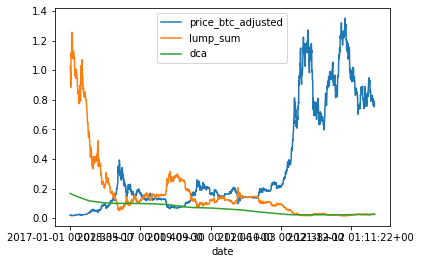

In [8]:
df['price_btc_adjusted'] = df['price_btc'] / 50000
df[['price_btc_adjusted', 'lump_sum', 'dca']].plot()

<AxesSubplot:xlabel='date'>

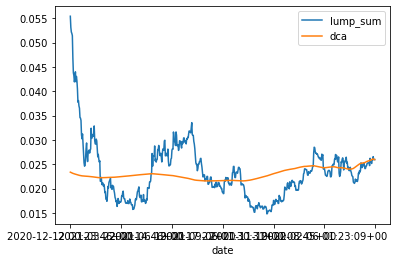

In [10]:
# Zooming in
df[-600:][['lump_sum', 'dca']].plot()